## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

---

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#Import the CSV file into the datafram df
df = pd.read_csv('ab_data.csv')

#read sample of 6 rows
df.sample(6)

,user_id,timestamp,group,landing_page,converted
173799,937058,2017-01-10 00:33:43.869873,treatment,new_page,0
251449,704906,2017-01-09 16:40:54.312775,treatment,new_page,0
33128,863252,2017-01-12 21:35:00.036359,control,old_page,0
294266,675603,2017-01-14 23:19:09.960177,control,old_page,0
237070,926300,2017-01-10 03:01:00.100588,treatment,new_page,1
13917,937040,2017-01-24 04:35:31.996847,control,old_page,0


In [4]:
# Describe the dataframe
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [5]:
# Get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [6]:
print(f"Dataframe number of rows = {len(df.index)} Rows")

Dataframe number of rows = 294478 Rows


c. The number of unique users in the dataset.

In [7]:
# Get the number of unique users ID in the dataframe
print(f"The Number of unique Users = {len(df['user_id'].unique())} Users")

The Number of unique Users = 290584 Users


d. The proportion of users converted.

In [8]:
print(f"The proportion of users converted in percentage: {df['converted'].mean():%}")

The proportion of users converted in percentage: 11.965919%


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
# Get the rows for "control" and "treatment" pages in separate dataframe
df_page_control = df.query('group == "control"')
df_page_treat = df.query('group == "treatment"')

# Get the rows for "control" and "treatment" pages with new or old landing page in separate dataframe
df_page_control_new = df_page_control.query('landing_page == "new_page"')
df_page_treat_old = df_page_treat.query('landing_page == "old_page"')

print(f"The number of times the new_page and treatment don't line up = {len(df_page_control_new.index) + len(df_page_treat_old.index)} times")

The number of times the new_page and treatment don't line up = 3893 times


f. Do any of the rows have missing values?

In [10]:
# check for the missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

---

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
# Handle the rows where the landing_page and group columns don't match.
df_treatment_old_page = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_control_new_page = df[(df.group == 'control') & (df.landing_page == 'old_page')] 

# Merge the two filtered dataframes in onedataframe df2.
df2 = pd.concat([df_treatment_old_page, df_control_new_page])

In [12]:
# first check
df2[(df2['group'] == 'treatment') == (df2['landing_page'] == 'old_page')]

,user_id,timestamp,group,landing_page,converted


In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

---

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
# Get the number of unique users ID in the dataframe
print(f"The Number of unique User_ids = {len(df2['user_id'].unique())} users_ids")

The Number of unique User_ids = 290584 users_ids


In [15]:
# another check
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
#find out the duplicate user_id

sum(df2.duplicated(['user_id']))

1

In [17]:
# show the user_id duplicated.
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [18]:
# show the info for the duplicated two rows.
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [19]:
# The two rows are similar in all columns except timestamp "date and time". so we can remove the second one without affect the information insights.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
# check the data before
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [21]:
#remove one of the duplicated rows
df2.drop(labels=2893, inplace=True)

In [22]:
# # check the data after deletion
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


---

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
# probability of an individual converting regardless of the page
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
# Show the control group probability they converted
df_grouped = df2.groupby(['group'],as_index=False).mean()

print(f"control group,The probability they converted = {df_grouped['converted'][0]}")

control group,The probability they converted = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
# Show the treatment group probability they converted
print(f"treatment group,The probability they converted = {df_grouped['converted'][1]}")

treatment group,The probability they converted = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [26]:
print(f"""the probability of an individual received the new page = {len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)}""")

the probability of an individual received the new page = 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

# Outcome:

* 1- Regarding the result and the outcome of the above results i think alot of number of people that converted in the control group rather than the treatment group.
* 2- The percentage of converted pages is most equal "control page is 12.04% and the treatment page is 11.88%", so there is no need to convert to the new page.


---
---

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
# the convert rate for  𝑝𝑛𝑒𝑤  under the null
p_new = df2['converted'].mean()

print(f"the convert rate for  P𝑛𝑒𝑤  under the null = {p_new}")

the convert rate for  P𝑛𝑒𝑤  under the null = 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
# the convert rate for  𝑝𝑜𝑙𝑑  under the null
p_old = df2['converted'].mean()

print(f"the convert rate for  P𝑜𝑙𝑑  under the null = {p_new}")

the convert rate for  P𝑜𝑙𝑑  under the null = 0.11959708724499628


c. What is $n_{new}$?

In [51]:
# get the 𝑛𝑛𝑒𝑤, the number of user with the new page.
n_new = len(df2.query('landing_page == "new_page"'))

print(f"the 𝑛𝑛𝑒𝑤, the number of user with the new page = {n_new}")

the 𝑛𝑛𝑒𝑤, the number of user with the new page = 145310


d. What is $n_{old}$?

In [30]:
# get the 𝑛𝑜𝑙𝑑, the number of user with the old page.
n_old = len(df2.query('landing_page != "new_page"'))

print(f"the 𝑛𝑜𝑙𝑑, the number of user with the new page = {n_old}")

the 𝑛𝑜𝑙𝑑, the number of user with the new page = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.binomial(1,p_new,n_new)

print(f"𝑛𝑛𝑒𝑤  transactions with a convert rate of 𝑝𝑛𝑒𝑤 under the null = {new_page_converted.mean()}")

𝑛𝑛𝑒𝑤  transactions with a convert rate of 𝑝𝑛𝑒𝑤 under the null = 0.12028766086298259


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.binomial(1,p_old,n_old)

print(f"𝑛𝑜𝑙𝑑  transactions with a convert rate of  𝑝𝑜𝑙𝑑  under the null = {old_page_converted.mean()}")

𝑛𝑜𝑙𝑑  transactions with a convert rate of  𝑝𝑜𝑙𝑑  under the null = 0.1206272285474345


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
print(f"𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 for your simulated values = {new_page_converted.mean() - old_page_converted.mean()}")

𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 for your simulated values = -0.00033956768445191077


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
# Simulate 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using this same process
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

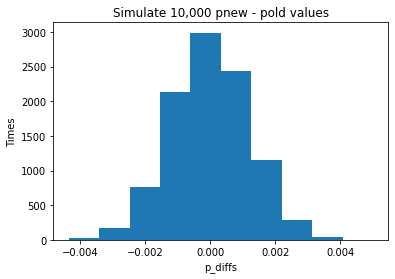

In [35]:
plt.hist(np.array(p_diffs));
plt.xlabel('p_diffs')
plt.ylabel('Times')
plt.title('Simulate 10,000 pnew - pold values');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
# Calculate the proportion of the p_diffs are greater than the actual difference
df_control = df2.query('group == "control"')
df_treatment = df2.query('group == "treatment"')
actual_diff = df_treatment.converted.mean() - df_control.converted.mean()
print(f"the proportion of the p_diffs are greater than the actual difference = {actual_diff}")

the proportion of the p_diffs are greater than the actual difference = -0.0015782389853555567


In [37]:
# Calculate the p-value from difference
p_diffs = np.array(p_diffs)
# proportion of p_diffs greater than the actual difference observed in ab_data.csv is computed as:
(actual_diff < p_diffs).mean()

0.9073

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**My Explanation**

Based on the information we showed that, the p_diffs is greater than the actual_diff, witch represent the p_valur that mean we can not refuse the null hypothesis option and alse can not accept the alternative hypothesis option.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [47]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()

print(f"convert_old = {convert_old}\nconvert_new = {convert_new}\nn_old = {n_old}\nn_new = {n_new}")

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
# Calculate the z_score and p_value using sm.stats.proportions_ztest.
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

print(f"z_score = {z_score}\np_value = {p_value}")

z_score = 1.3109241984234394
p_value = 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**My answer**

- The z_score is 1.3109241984234394 is greater than the p_value is 0.18988337448195103 that mean we can not refuse the null hypothesis option.
- Sure i am agreed with whate we find in the parts j. and k..


---
---

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**My answer:** 
 I will use a logistic regression, Where the "converted" and "not converted" is a binary variable 0 or 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [55]:
# Prepare the dataframe for the regression model
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2['intercept'] = 1
df2.sample(6)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
109338,664284,2017-01-11 20:33:16.568817,control,old_page,0,1,0
100159,642071,2017-01-12 06:41:46.373881,treatment,new_page,0,1,1
245656,721289,2017-01-21 04:46:16.114752,control,old_page,0,1,0
125987,774672,2017-01-10 22:52:36.608866,control,old_page,0,1,0
29275,909684,2017-01-12 23:23:05.782837,treatment,new_page,0,1,1
276824,815011,2017-01-20 07:28:40.501763,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [70]:
# fit the regression model using 'intercept' and 'ab_page'.
reg_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
reg_mod_res = reg_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [59]:
# show the summary of the regression model
reg_mod_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-08-11 05:57 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**My answer**

- the p-value associated with ab_page is 0.19.
- That p-value is differ from the value found in Part II becuse i used the z score using the regression model assuming the intercept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**My answer**

- I think considring other factor to added into the regression model will influence an individual converts where adding anthe factor will make the model more accurate.
- I think the disadvantages to adding additional terms into your regression model is make the model more comlicated and limit the model with the factors added.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [67]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

# show samples of rows in the new datafrae after adding the country column.
df_new.sample(6)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
791509,US,2017-01-24 09:56:38.288494,control,old_page,0,1,0
839345,US,2017-01-11 22:00:32.116449,treatment,new_page,1,1,1
736462,US,2017-01-22 20:26:07.497169,control,old_page,1,1,0
943799,US,2017-01-08 08:42:28.966474,control,old_page,0,1,0
699264,UK,2017-01-17 05:12:43.607516,control,old_page,0,1,0
757023,UK,2017-01-22 00:30:25.052908,control,old_page,0,1,0


In [68]:
### Create the necessary dummy variables for the countries codes
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

# show the count of each country group.
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [72]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1
reg_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
reg_mod_res = reg_mod.fit()

# show the summary of the regression model
reg_mod_res.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 Aug 2021   Pseudo R-squ.:                 -0.2214
Time:                        06:18:06   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

---
---

<a id='conclusions'></a>
## Conclusions

After analysis the case with the logistic regression model, z_test, and p_value and beased the out come of analysis we recomend that:
- Keep using the old page where no fesability to convert to ather page.
- That option will saving the time and the cost.
- Accept the null hypothesis and refuse the alternative hypothesis.

NB: the analysis result based on and limited to the data and parameter collected and may be changed if collect more data or paramters.